In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dulieuxettuyendaihoc.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')

In [3]:
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]

In [4]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)

In [5]:
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)

<Axes: >

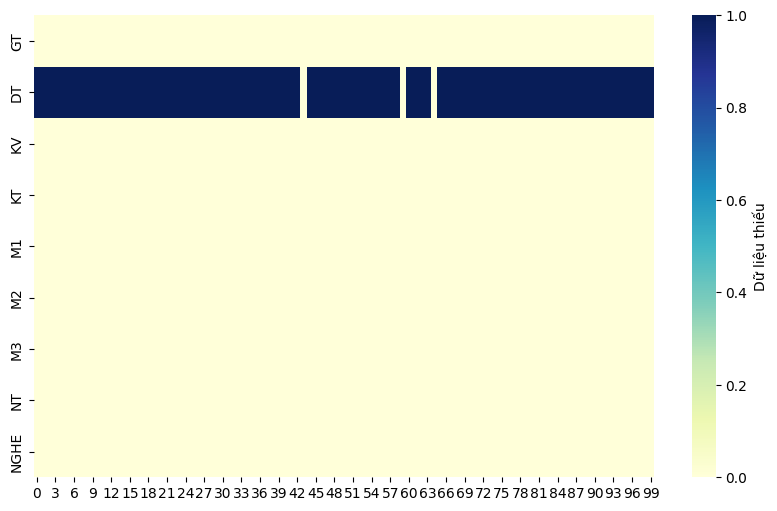

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})

In [7]:
plt.savefig('missingdata.png', dpi=100)
plt.show()

<Figure size 640x480 with 0 Axes>

In [8]:
df['DT'].fillna('KINH', inplace=True)

In [9]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3

In [10]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

In [11]:
df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

In [12]:
df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

In [13]:
df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'

In [14]:
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}

In [15]:
df['NHOM'] = df['KT'].map(dict_map)

In [16]:
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

In [17]:
df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))

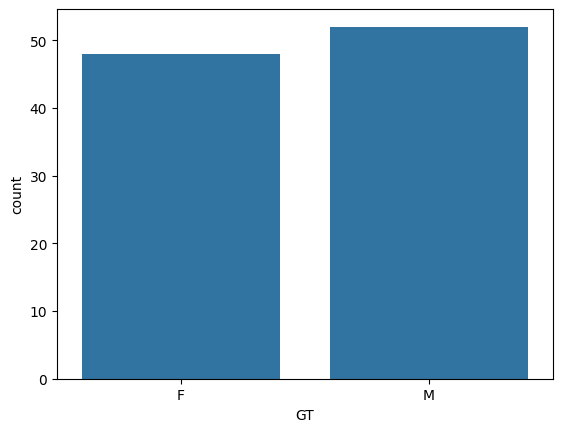

In [18]:
sns.countplot(x='GT', data=df)
plt.show()

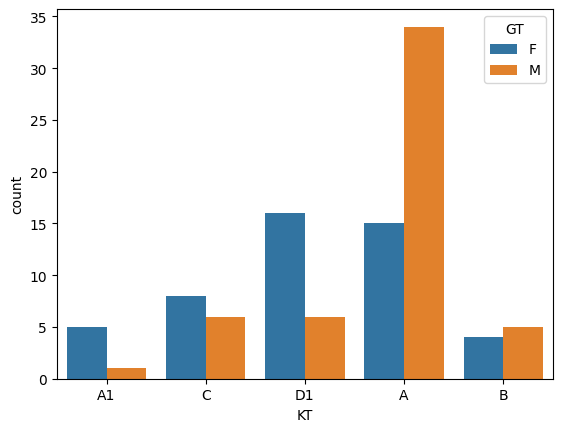

In [19]:
sns.countplot(x='KT', hue='GT',data=df)
plt.show()

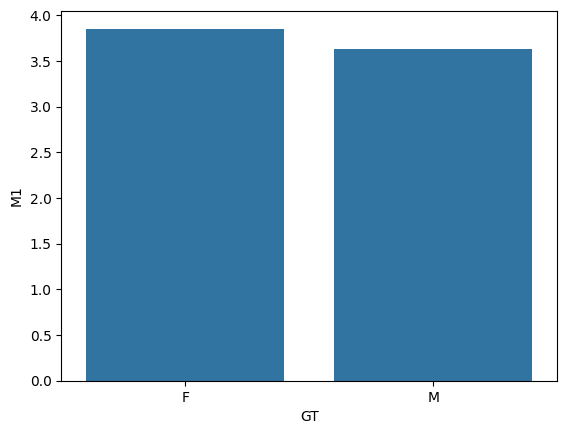

In [20]:
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()

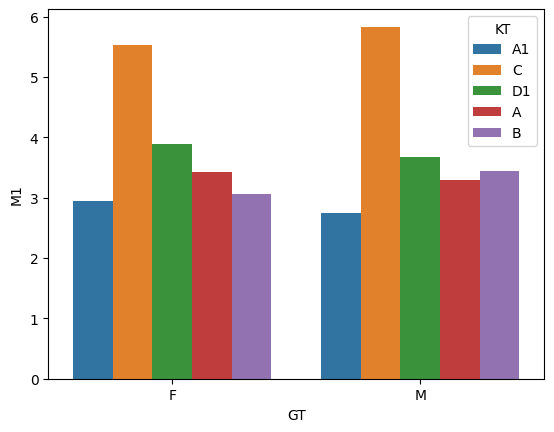

In [21]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()

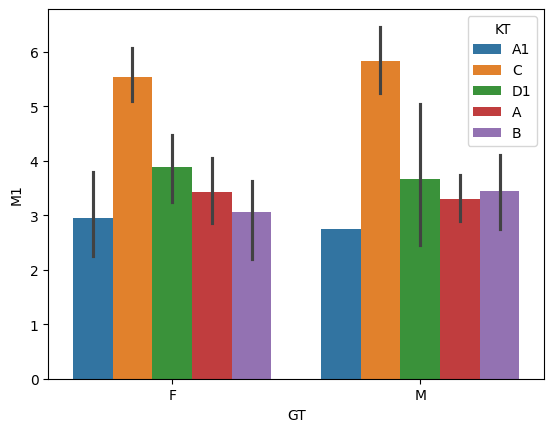

In [22]:
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

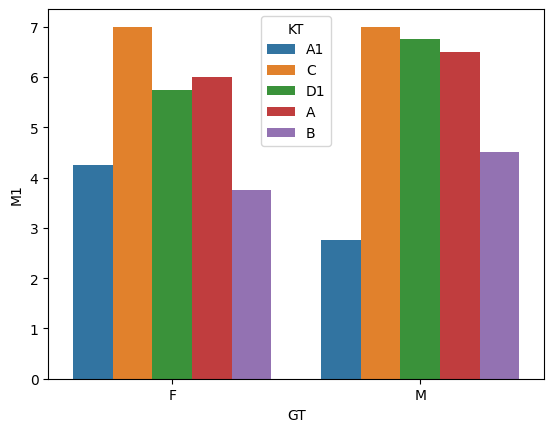

In [23]:
sns.barplot(x='GT', y='M1', hue='KT', data=df, 
            errorbar=None, estimator=max)
plt.show()

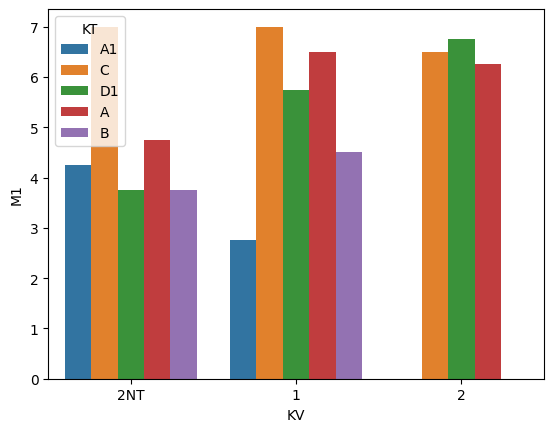

In [24]:
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
plt.show()

In [25]:
gb = df.groupby(['KT'])['KT'].agg(['count'])
labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]
colors = sns.color_palette('pastel') # Tạo bảng màu

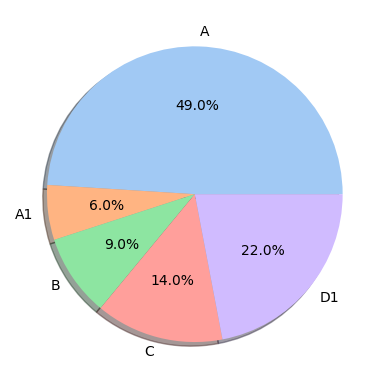

In [26]:
plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

In [27]:
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])
labels = gb.index
data = list(gb['sum'])
colors = sns.color_palette('pastel') # Tạo bảng màu

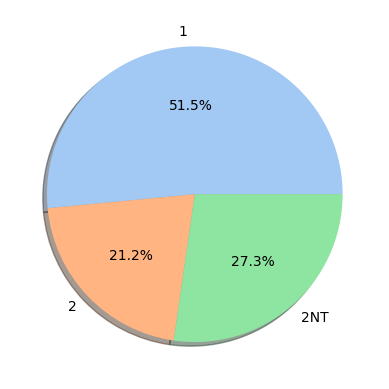

In [28]:
plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

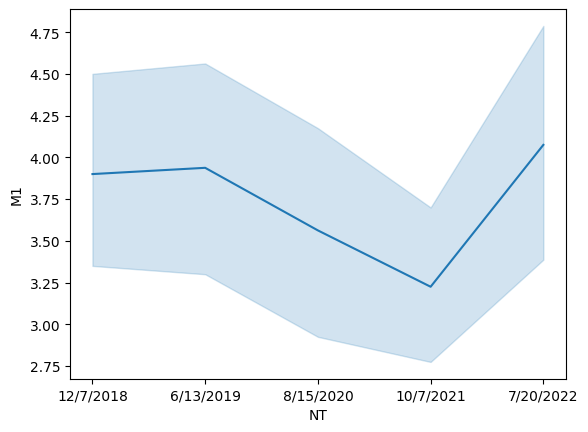

In [29]:
sns.lineplot(x='NT', y='M1', data=df)
plt.show()

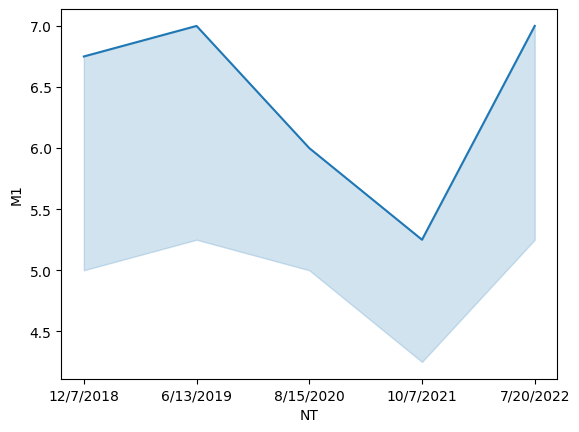

In [30]:
sns.lineplot(x='NT', y='M1', data=df, estimator=np.max)
plt.show()

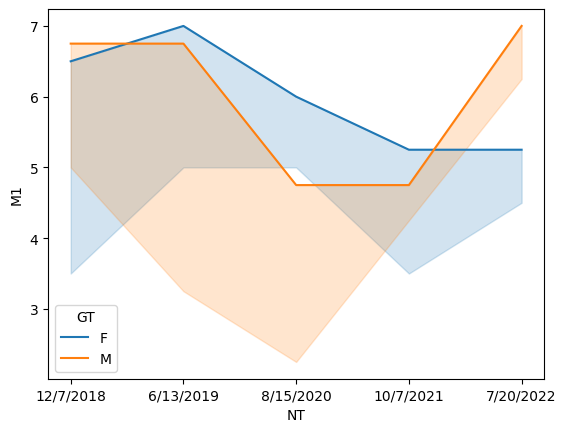

In [31]:
sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()